In [77]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [80]:
# in order to better understand data during EDA, we should convert letter values to full words
cap_shape={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(cap_shape)

cap_surface={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(cap_surface)

cap_color={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(cap_color)

odor={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(odor)

gill_attachment={"a":"attached","f":"free", "d":"descending", "n":"notched"}
data["gill-attachment"]=data["gill-attachment"].replace(gill_attachment)

gill_spacing={"c":"close","w":"crowded", "d":"distant"}
data["gill-spacing"]=data["gill-spacing"].replace(gill_spacing)

gill_size={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(gill_size)

gill_color={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(gill_color)

stalk_shape={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(stalk_shape)

stalk_root={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(stalk_root)

stalk_surface_above_ring={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(stalk_surface_above_ring)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(stalk_surface_above_ring)

stalk_color_above_ring={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(stalk_color_above_ring)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(stalk_color_above_ring)

veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)

veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)

ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)

ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)

spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)

population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)

habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)

bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

classification={"e":"edible","p":"poisonous"}
data["class"]=data["class"].replace(classification)


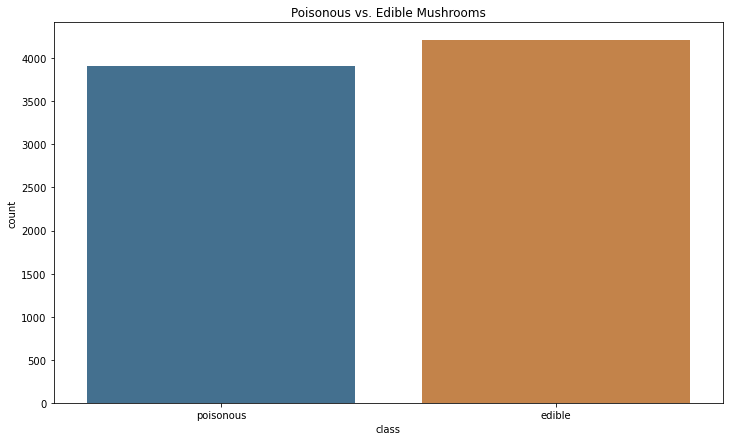

In [81]:
plt.figure(figsize=(12,7))
class_plt = sns.countplot(x = 'class', data = data, saturation = 0.5).set(title="Poisonous vs. Edible Mushrooms")

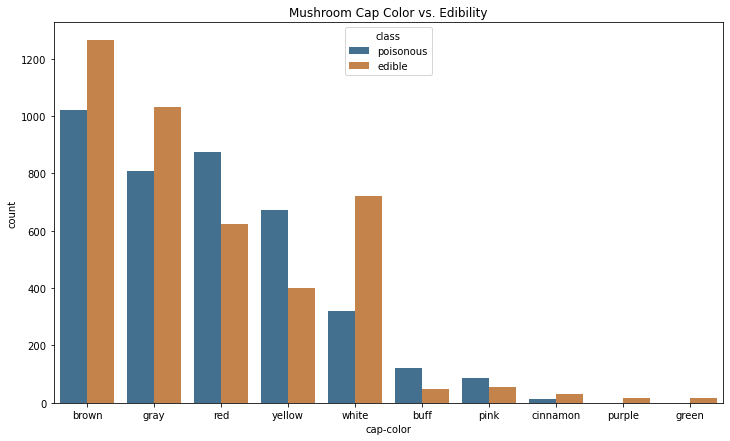

In [93]:
plt.figure(figsize=(12,7))
color_class_plt = sns.countplot(x = 'cap-color', data = data, hue = 'class', order = data['cap-color'].value_counts().index, saturation = 0.5).set(title = "Mushroom Cap Color vs. Edibility")

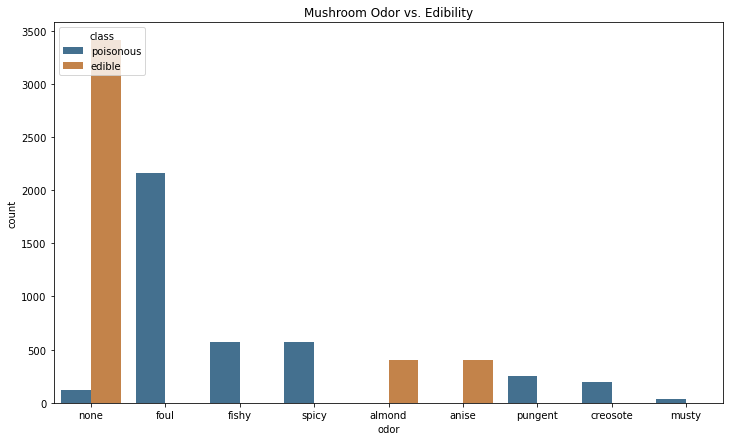

In [94]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'odor', data = data, hue = 'class', order = data['odor'].value_counts().index, saturation = 0.5).set(title = "Mushroom Odor vs. Edibility")

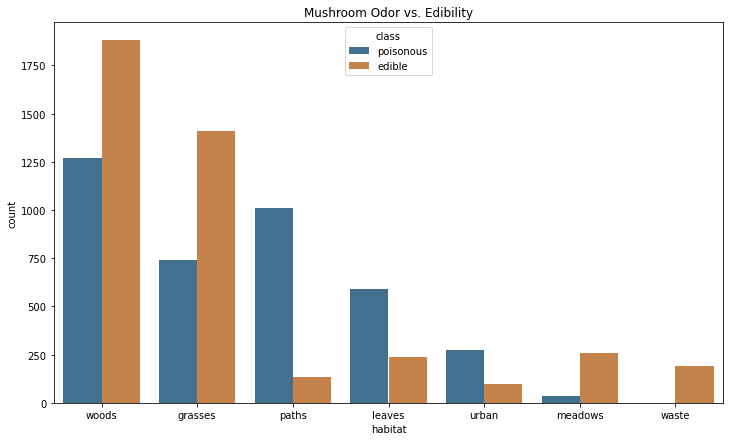

In [95]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'habitat', data = data, hue = 'class', order = data['habitat'].value_counts().index, saturation = 0.5).set(title = "Mushroom Odor vs. Edibility")

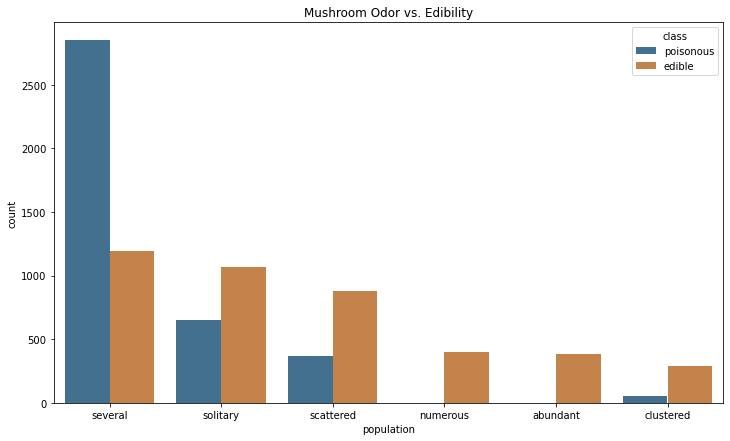

In [96]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'population', data = data, hue = 'class', order = data['population'].value_counts().index, saturation = 0.5).set(title = "Mushroom Odor vs. Edibility")